# Exploratory Data Analysis for Sunspot data

Source: WDC-SILSO, Royal Observatory of Belgium, Brussels (https://sidc.be/SILSO/datafiles)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [34]:
df = pd.read_csv(
    '../data/SN_d_tot_V2.0.csv', # data downloaded on 2024-12-18
    delimiter=';', 
    header=None, 
    names=['year', 'month', 'day', 'dec_year', 'sn_value', 'sn_error', 'obs_num', 'definitive_ind']
)

In [35]:
df.head()

,year,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [36]:
len(df)

75575

In [37]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [38]:
df.iloc[-10:]

,year,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind,date
75565,2024,11,21,2024.889,115,19.2,21,0,2024-11-21
75566,2024,11,22,2024.892,143,19.7,29,0,2024-11-22
75567,2024,11,23,2024.895,151,21.2,18,0,2024-11-23
75568,2024,11,24,2024.898,171,27.0,20,0,2024-11-24
75569,2024,11,25,2024.900,167,22.2,22,0,2024-11-25
75570,2024,11,26,2024.903,160,22.1,30,0,2024-11-26
75571,2024,11,27,2024.906,205,32.3,18,0,2024-11-27
75572,2024,11,28,2024.908,170,19.7,30,0,2024-11-28
75573,2024,11,29,2024.911,161,20.3,30,0,2024-11-29
75574,2024,11,30,2024.914,121,14.8,22,0,2024-11-30


In [47]:
df_recent = df[df['date'] >= '1990-01-01'].copy()
df_recent = df_recent.set_index('date')
len(df_recent)

12753

In [48]:
df_recent.head()

,year,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind
date,,,,,,,,
1990-01-01,1990,1,1,1990.001,239,8.6,13,1
1990-01-02,1990,1,2,1990.004,226,12.8,13,1
1990-01-03,1990,1,3,1990.007,213,13.0,17,1
1990-01-04,1990,1,4,1990.010,223,10.5,15,1
1990-01-05,1990,1,5,1990.012,210,9.0,17,1


In [49]:
# definitive_ind: 1 = definitive, 0 = provisional
# Use data that is definitive only
df_recent.groupby('definitive_ind').size()

definitive_ind
0      153
1    12600
dtype: int64

In [50]:
df_recent[df_recent['definitive_ind'] == 0].groupby('year').size()

year
2024    153
dtype: int64

In [51]:
df_recent[df_recent['definitive_ind'] == 0].groupby('year').min('date')

,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind
year,,,,,,,
2024,7,1,2024.499,70,9.7,14,0


In [52]:
df_recent = df_recent[df_recent['definitive_ind'] == 1]

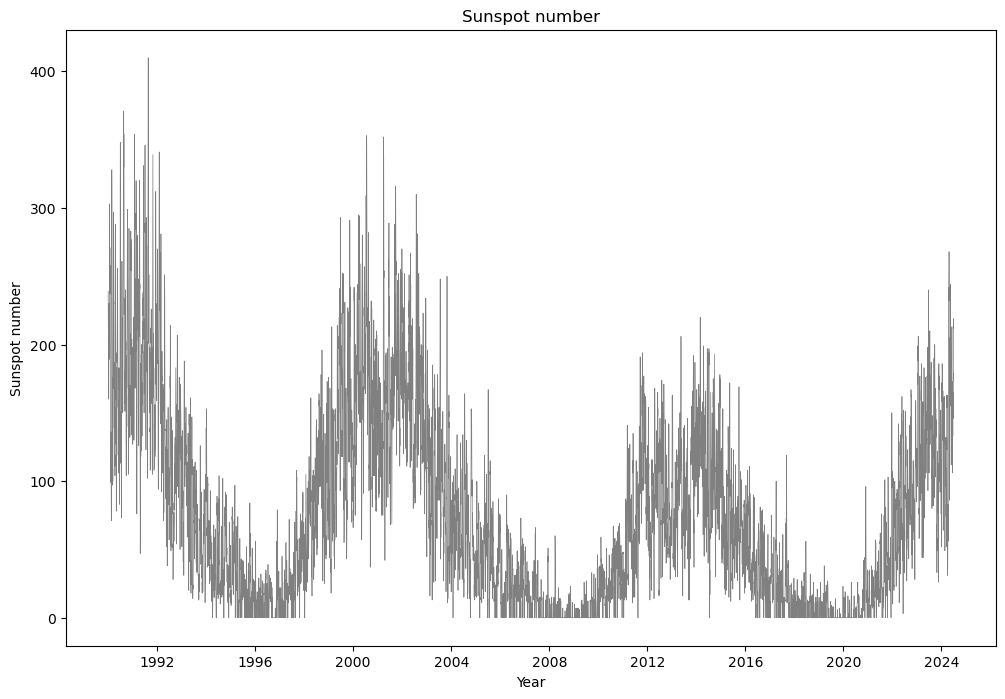

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(df_recent.index, df_recent['sn_value'], linewidth=0.5, c='grey')
plt.xlabel('Year')
plt.ylabel('Sunspot number')
plt.title('Sunspot number')
plt.show()